# Proyek Klasifikasi Gambar: Butterfly Image Classification
- **Nama:** Lutfi Aundrie Hermawan
- **Email:** lutfiaunher@gmail.com
- **ID Dicoding:** A126YBF254

## Import Semua Packages/Library yang Digunakan

In [1]:
# Library TensorFlow
!pip uninstall tensorflowjs
!pip install tensorflowjs

import tensorflow as tf
import tensorflowjs as tfjs
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Flatten, Dropout, Dense,
    GlobalAveragePooling2D, BatchNormalization
)

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import EfficientNetV2B0, MobileNetV2
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.3 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-bigquery 3.31.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.


In [2]:
import os
import random
import shutil
import pathlib
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from PIL import Image
import cv2
import gdown
import absl.logging
import logging
import csv

## Data Preparation

Download Dataset melalui Google Drive

[Google Drive](https://drive.google.com/file/d/1UhgDkbQY_8PGlE98EuiXcP5kWjaiQnOW/view?usp=drive_link)

### Data Loading

In [3]:
# Meload data pada Google Drive
file_id = '1UhgDkbQY_8PGlE98EuiXcP5kWjaiQnOW'

url = f'https://drive.google.com/uc?id={file_id}'
output = '/content/Dataset-Flowers.zip'

gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1UhgDkbQY_8PGlE98EuiXcP5kWjaiQnOW
From (redirected): https://drive.google.com/uc?id=1UhgDkbQY_8PGlE98EuiXcP5kWjaiQnOW&confirm=t&uuid=35fcdbef-85f5-4305-8bca-d770a5e53373
To: /content/Dataset-Flowers.zip
100%|██████████| 215M/215M [00:01<00:00, 109MB/s]


'/content/Dataset-Flowers.zip'

### Data Preprocessing

#### Unzip Dataset and Remove Dataset .zip

In [4]:
!unzip Dataset-Flowers.zip -d Dataset-Flowers/

Streaming output truncated to the last 5000 lines.
  inflating: Dataset-Flowers/train/iris/17858672081_4b4d071116_c.jpg  
  inflating: Dataset-Flowers/train/iris/17885928250_451875aec2_c.jpg  
  inflating: Dataset-Flowers/train/iris/17948299355_2161a031db_c.jpg  
  inflating: Dataset-Flowers/train/iris/17959086836_3e706d918b_c.jpg  
  inflating: Dataset-Flowers/train/iris/18054931376_23052f68d0_c.jpg  
  inflating: Dataset-Flowers/train/iris/18059533553_186ccb451a_c.jpg  
  inflating: Dataset-Flowers/train/iris/18076633321_400ea17b5a_c.jpg  
  inflating: Dataset-Flowers/train/iris/18120244292_ea11fcc9c5_c.jpg  
  inflating: Dataset-Flowers/train/iris/181379030_afebe26851_c.jpg  
  inflating: Dataset-Flowers/train/iris/18141122602_118114762d_c.jpg  
  inflating: Dataset-Flowers/train/iris/18256508742_af6a8f4222_c.jpg  
  inflating: Dataset-Flowers/train/iris/18280071332_c6bc90d75a_c.jpg  
  inflating: Dataset-Flowers/train/iris/18348714266_33a7bf205f_c.jpg  
  inflating: Dataset-Flowers

In [5]:
remove_file = '/content/Dataset-Flowers.zip'
os.remove(remove_file)

#### Cek Keberagaman pada Dataset

In [6]:
import os
from PIL import Image

def count_images_and_resolution(base_path, target_resolution=None):
    class_count = {}
    resolution_count = {}

    for root, dirs, files in os.walk(base_path):
        if root == base_path:
            continue  # Lewati folder utama

        class_name = os.path.basename(root)
        class_count[class_name] = 0

        for file in files:
            if not file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                continue  # Lewati jika bukan file gambar

            file_path = os.path.join(root, file)
            with Image.open(file_path) as img:
                width, height = img.size
                resolution = f"{width}x{height}"

                class_count[class_name] += 1

                if resolution not in resolution_count:
                    resolution_count[resolution] = 0
                resolution_count[resolution] += 1

                if target_resolution and resolution == target_resolution:
                    if 'target' not in resolution_count:
                        resolution_count['target'] = 0
                    resolution_count['target'] += 1

    return class_count, resolution_count

# Contoh penggunaan
base_path = "/content/Dataset-Flowers/"
target_resolution = "256x256"

class_count, resolution_count = count_images_and_resolution(base_path, target_resolution)

print("Jumlah gambar per kelas:")
for class_name, count in class_count.items():
    print(f"{class_name}: {count}")

print("\nJumlah gambar per resolusi:")
for resolution, count in resolution_count.items():
    print(f"{resolution}: {count}")


Jumlah gambar per kelas:
train: 0
iris: 7
sunflower: 7
black_eyed_susan: 7
dandelion: 7
water_lily: 7
coreopsis: 7
rose: 7
common_daisy: 7
bellflower: 7
california_poppy: 7
carnation: 7
astilbe: 7
tulip: 7
calendula: 7
val: 0

Jumlah gambar per resolusi:
256x256: 12756
target: 12756
799x534: 23
799x533: 238
800x561: 4
800x533: 27
799x571: 30
800x532: 7
610x800: 1
800x530: 14
800x800: 50
800x531: 7
800x534: 52
800x508: 1
800x566: 2
800x600: 76
800x434: 1
800x708: 1
800x507: 2
800x571: 4
800x541: 2
800x450: 23
799x614: 2
800x563: 3
800x677: 2
800x547: 1
799x600: 4
533x799: 22
800x588: 1
800x640: 15
600x800: 8
800x559: 1
800x617: 1
799x541: 1
800x538: 1
800x338: 1
799x548: 2
800x481: 1
800x513: 2
800x595: 4
800x799: 5
534x800: 10
800x736: 1
799x527: 2
800x678: 1
800x639: 2
799x582: 2
720x488: 1
799x503: 1
800x570: 2
800x468: 3
442x800: 1
799x546: 3
800x497: 1
572x799: 1
800x567: 2
800x535: 3
799x800: 6
800x644: 2
571x799: 3
800x449: 7
800x525: 3
799x594: 1
800x500: 3
800x638: 1
797x625: 1

#### Cek Daftar Label pada Dataset

In [7]:
image_data='/content/Dataset-Flowers/train'
pd.DataFrame(os.listdir(image_data),columns=['Files_Name'])

,Files_Name
0,iris
1,sunflower
2,black_eyed_susan
3,dandelion
4,classname.txt
5,water_lily
6,coreopsis
7,rose
8,common_daisy
9,bellflower


In [8]:
image_test_data='/content/Dataset-Flowers/val'
pd.DataFrame(os.listdir(image_test_data),columns=['Files_Name'])

,Files_Name
0,iris
1,sunflower
2,black_eyed_susan
3,dandelion
4,classname.txt
5,water_lily
6,coreopsis
7,rose
8,common_daisy
9,bellflower


In [9]:
files = [i for i in glob.glob(image_data + "//*//*")]
np.random.shuffle(files)
labels = [os.path.dirname(i).split("/")[-1] for i in files]
data = zip(files, labels)
dataframe = pd.DataFrame(data, columns = ["Image", "Label"])
dataframe

,Image,Label
0,/content/Dataset-Flowers/train/iris/3482736271...,iris
1,/content/Dataset-Flowers/train/rose/1931766534...,rose
2,/content/Dataset-Flowers/train/dandelion/56467...,dandelion
3,/content/Dataset-Flowers/train/sunflower/33109...,sunflower
4,/content/Dataset-Flowers/train/california_popp...,california_poppy
...,...,...
13637,/content/Dataset-Flowers/train/rose/9246201815...,rose
13638,/content/Dataset-Flowers/train/carnation/30628...,carnation
13639,/content/Dataset-Flowers/train/iris/164507281_...,iris
13640,/content/Dataset-Flowers/train/california_popp...,california_poppy


<ipython-input-10-df88854e0a6f>:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


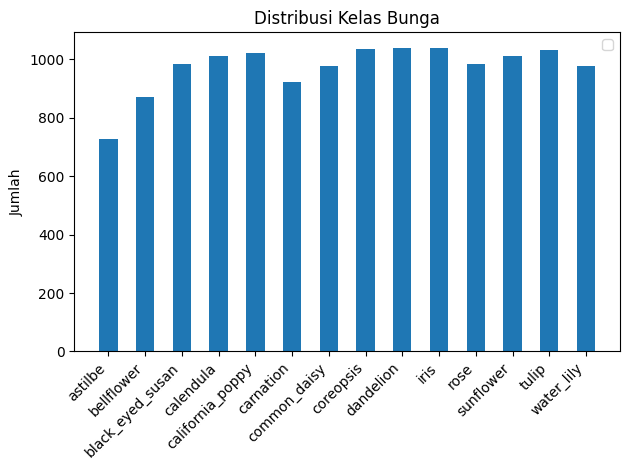

In [10]:
# Bersihkan label
dataframe["Label"] = dataframe["Label"].str.strip()

# Hitung jumlah per label
label_counts = dataframe["Label"].value_counts().sort_index()

# Siapkan posisi bar dan value
x_pos = np.arange(len(label_counts))
counts = label_counts.values
labels = label_counts.index

# Plot bar
fig, ax = plt.subplots()
ax.bar(x_pos, counts, width=0.5)

ax.set_xticks(x_pos)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_ylabel('Jumlah')
ax.set_title('Distribusi Kelas Bunga')
ax.legend()

plt.tight_layout()
plt.show()

#### Combine Dataset

In [11]:
base_dir = 'Dataset-Flowers'
combined_dir = 'combined_dataset'

# Gabungkan semua gambar
os.makedirs(combined_dir, exist_ok=True)

for split in ['train', 'val']:
    split_path = os.path.join(base_dir, split)
    for class_name in os.listdir(split_path):
        class_path = os.path.join(split_path, class_name)
        if not os.path.isdir(class_path):
            continue

        new_class_path = os.path.join(combined_dir, class_name)
        os.makedirs(new_class_path, exist_ok=True)

        for img in os.listdir(class_path):
            src = os.path.join(class_path, img)
            dst = os.path.join(new_class_path, img)
            shutil.copy2(src, dst)

#### Split Dataset

In [12]:
# Folder gabungan sebelum split
combined_dir = 'combined_dataset'

# Folder baru untuk dataset split
split_base = 'dataset_split'
for split in ['train', 'val', 'test']:
    for class_name in os.listdir(combined_dir):
        os.makedirs(os.path.join(split_base, split, class_name), exist_ok=True)

# Folder test dibuat tanpa subfolder class
os.makedirs(os.path.join(split_base, 'test'), exist_ok=True)

# Atur rasio split
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# Split dan salin file
for class_name in os.listdir(combined_dir):
    class_dir = os.path.join(combined_dir, class_name)
    if not os.path.isdir(class_dir):
        continue

    images = os.listdir(class_dir)
    random.shuffle(images)

    total = len(images)
    train_end = int(total * train_ratio)
    val_end = train_end + int(total * val_ratio)

    train_imgs = images[:train_end]
    val_imgs = images[train_end:val_end]
    test_imgs = images[val_end:]

    for img in train_imgs:
        shutil.copy2(
            os.path.join(class_dir, img),
            os.path.join(split_base, 'train', class_name, img)
        )
    for img in val_imgs:
        shutil.copy2(
            os.path.join(class_dir, img),
            os.path.join(split_base, 'val', class_name, img)
        )
    for img in test_imgs:
        shutil.copy2(
            os.path.join(class_dir, img),
            os.path.join(split_base, 'test', class_name, img)
        )


#### Data Augmentasi Train

In [13]:
# Definisikan augmentasi
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

dataset_folder = '/content/dataset_split/train'

# Loop semua kelas (subfolder)
for class_name in os.listdir(dataset_folder):
    class_path = os.path.join(dataset_folder, class_name)

    if not os.path.isdir(class_path):
        continue  # Skip kalau bukan folder

    # Loop semua gambar dalam subfolder
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)

        try:
            # Load gambar
            img = load_img(img_path)
            x = img_to_array(img)
            x = np.expand_dims(x, axis=0)

            # Generate 1 augmentasi per gambar
            i = 0
            for batch in datagen.flow(
                x,
                batch_size=1,
                save_to_dir=class_path,         # <-- simpan ke folder asli
                save_prefix='aug',              # <-- prefix nama file baru
                save_format='jpg'                # <-- format gambar
            ):
                i += 1
                if i >= 1:  # <-- jumlah augmentasi per gambar
                    break
        except Exception as e:
            print(f"Error processing {img_path}: {e}")

#### Load Train, Val, Test

In [15]:

batch_size = 32
target_size = (224, 224)

# Load train dataset
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory=os.path.join('/content/dataset_split/train'),
    label_mode='categorical',  # pakai categorical kalau multi-class
    image_size=target_size,
    batch_size=batch_size,
    shuffle=True,
    seed=123
)

# Load validation dataset
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory=os.path.join('/content/dataset_split/val'),
    label_mode='categorical',
    image_size=target_size,
    batch_size=batch_size,
    shuffle=False,
    seed=123
)

# Load test dataset
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory=os.path.join('/content/dataset_split/test'),
    label_mode='categorical',
    image_size=target_size,
    batch_size=batch_size,
    shuffle=False,
    seed=123
)

Found 18920 files belonging to 14 classes.
Found 2053 files belonging to 14 classes.
Found 2075 files belonging to 14 classes.


## Class Weights

In [16]:
def calculate_class_weights(y_labels, class_names):
    unique_classes, class_counts = np.unique(y_labels, return_counts=True)
    total_samples = len(y_labels)
    class_weights = {}

    # Create weights for all classes in class_names, even if not in train data
    for class_name in class_names:
        if class_name in unique_classes:  # If class is in train data
            class_index = np.where(unique_classes == class_name)[0][0]
            class_count = class_counts[class_index]
            weight = total_samples / (len(unique_classes) * class_count)
            class_weights[class_name] = round(weight, 2)
        else:  # If class is not in train data, give it a default weight (e.g., 1)
            class_weights[class_name] = 1.0

    return class_weights

# Extract labels from the train dataset
y_labels = []
for images, labels in train_dataset:  # Iterate through batches
    y_labels.extend(np.argmax(labels.numpy(), axis=1))  # Get class indices from one-hot encoded labels

# Get class names from the train dataset
class_names = train_dataset.class_names  # Access class names directly

# Calculate class weights using the updated function
raw_class_weights = calculate_class_weights(y_labels, class_names)  # Pass class_names to the function


# Create a dictionary mapping class indices to weights
indexed_class_weights = {i: raw_class_weights[class_name] for i, class_name in enumerate(class_names)}

print("Class weights (siap pakai untuk model):")
for idx, weight in indexed_class_weights.items():
    # Use the index to get the corresponding label
    label = class_names[idx]
    print(f"Index {idx} (Label '{label}'): {weight}")

Class weights (siap pakai untuk model):
Index 0 (Label 'astilbe'): 1.0
Index 1 (Label 'bellflower'): 1.0
Index 2 (Label 'black_eyed_susan'): 1.0
Index 3 (Label 'calendula'): 1.0
Index 4 (Label 'california_poppy'): 1.0
Index 5 (Label 'carnation'): 1.0
Index 6 (Label 'common_daisy'): 1.0
Index 7 (Label 'coreopsis'): 1.0
Index 8 (Label 'dandelion'): 1.0
Index 9 (Label 'iris'): 1.0
Index 10 (Label 'rose'): 1.0
Index 11 (Label 'sunflower'): 1.0
Index 12 (Label 'tulip'): 1.0
Index 13 (Label 'water_lily'): 1.0


## Modelling

### Model Sequential, Conv2D, Pooling Layer

In [17]:
#base_model = tf.keras.applications.MobileNetV2(
#    weights='imagenet',
#    include_top=False,
#    input_shape=(224, 224, 3)
#)

base_model = tf.keras.applications.MobileNetV3Large(input_shape=(224,224,3), include_top=False, weights='imagenet')
base_model.trainable = False

#base_model.trainable = False  # freeze pretrained VGG16

keras_model = tf.keras.models.Sequential([
    #tf.keras.Input(shape=(224,224,3)),
    base_model,

    # 2nd Block
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.LeakyReLU(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.3),

    # 3nd Block
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.LeakyReLU(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.3),

    # Fully Connected
    tf.keras.layers.Flatten(),

    #tf.keras.layers.Dense(512),
    #tf.keras.layers.LeakyReLU(),
    #tf.keras.layers.Dropout(0.5),

    #tf.keras.layers.Dense(256),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(14, activation='softmax')
])

# Print model summary
keras_model.summary()


12683000/12683000 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ MobileNetV3Large (Functional)   │ (None, 7, 7, 960)      │     2,996,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 7, 7, 64)       │       553,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 14)             │         1,806 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,625,038 (13.83 MB)

 Trainable params: 628,686 (2.40 MB)

 Non-trainable params: 2,996,352 (11.43 MB)

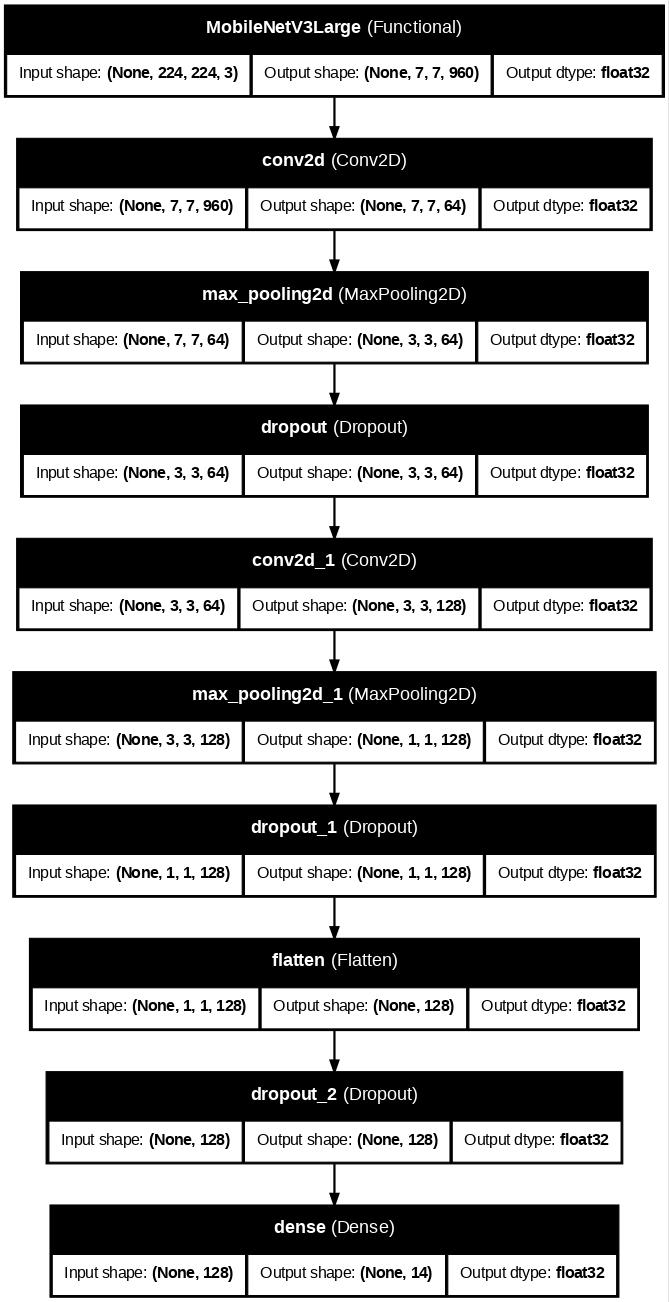

In [19]:
tf.keras.utils.plot_model(keras_model, to_file='model.jpg', show_shapes=True, show_layer_names=True,show_dtype=True,dpi=80)

### Callback

In [20]:
checkpoint = ModelCheckpoint("my_keras_model.keras", save_best_only=True)
early_stopping = EarlyStopping(patience=6, restore_best_weights=True)

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)

keras_model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

### Train Validation Model

In [21]:
history = keras_model.fit(
    train_dataset,
    epochs=40,
    validation_data=val_dataset,
    callbacks=[checkpoint, early_stopping],
    class_weight=indexed_class_weights
)

Epoch 1/40
592/592 ━━━━━━━━━━━━━━━━━━━━ 56s 67ms/step - accuracy: 0.1740 - loss: 3.7545 - val_accuracy: 0.7759 - val_loss: 0.9423
Epoch 2/40
592/592 ━━━━━━━━━━━━━━━━━━━━ 55s 38ms/step - accuracy: 0.6383 - loss: 1.1512 - val_accuracy: 0.8699 - val_loss: 0.4346
Epoch 3/40
592/592 ━━━━━━━━━━━━━━━━━━━━ 24s 40ms/step - accuracy: 0.8070 - loss: 0.6356 - val_accuracy: 0.8943 - val_loss: 0.3333
Epoch 4/40
592/592 ━━━━━━━━━━━━━━━━━━━━ 43s 43ms/step - accuracy: 0.8644 - loss: 0.4566 - val_accuracy: 0.9089 - val_loss: 0.2912
Epoch 5/40
592/592 ━━━━━━━━━━━━━━━━━━━━ 39s 40ms/step - accuracy: 0.8953 - loss: 0.3549 - val_accuracy: 0.9162 - val_loss: 0.2559
Epoch 6/40
592/592 ━━━━━━━━━━━━━━━━━━━━ 23s 39ms/step - accuracy: 0.9171 - loss: 0.2759 - val_accuracy: 0.9196 - val_loss: 0.2534
Epoch 7/40
592/592 ━━━━━━━━━━━━━━━━━━━━ 41s 39ms/step - accuracy: 0.9332 - loss: 0.2299 - val_accuracy: 0.9230 - val_loss: 0.2483
Epoch 8/40
592/592 ━━━━━━━━━━━━━━━━━━━━ 24s 40ms/step - accuracy: 0.9458 - loss: 0.1855 - 

## Evaluasi dan Visualisasi

### A. Evaluasi Model di Data Test

In [22]:
loss, accuracy = keras_model.evaluate(test_dataset)
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Loss: {loss:.4f}")

65/65 ━━━━━━━━━━━━━━━━━━━━ 7s 104ms/step - accuracy: 0.9136 - loss: 0.2967
Test Accuracy: 0.9373
Test Loss: 0.2254


### B. Visualisasi Model

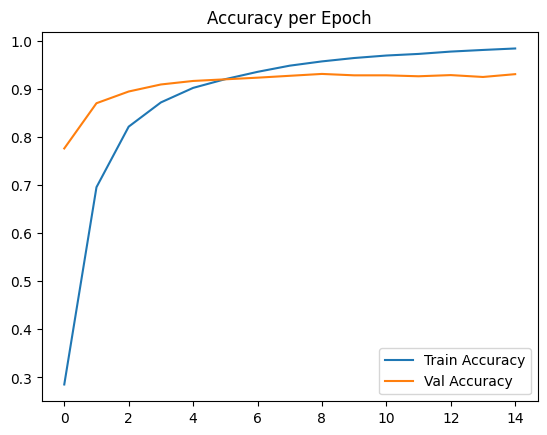

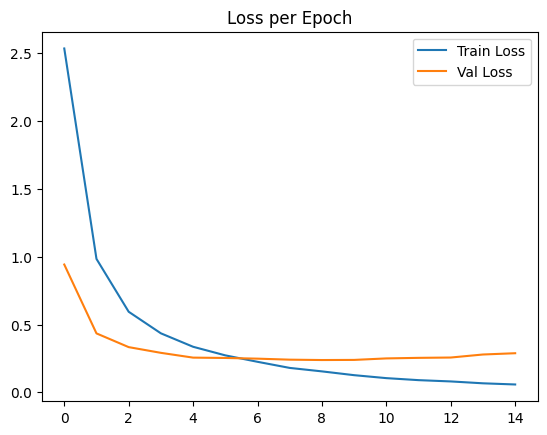

In [23]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy per Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss per Epoch')
plt.legend()
plt.show()

## Konversi Model

### Saved Model

In [24]:
keras_model.export("saved_model/my_model")

Saved artifact at 'saved_model/my_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_203')
Output Type:
  TensorSpec(shape=(None, 14), dtype=tf.float32, name=None)
Captures:
  139363802745168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139363802744592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139363802744016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139363802743248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139363802744976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139363821694480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139363821695440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139363821695056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139363802743440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139363821695632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13936

### TF-Lite

In [ ]:
# 1. Konversi SavedModel ke TFLite
converter = tf.lite.TFLiteConverter.from_saved_model("saved_model/my_model")
tflite_model = converter.convert()

# 2. Buat folder simpan model TFLite
os.makedirs('tflite', exist_ok=True)

# 3. Simpan model .tflite
with open('tflite/model.tflite', 'wb') as f:
    f.write(tflite_model)

print("Model berhasil dikonversi ke TFLite dan disimpan sebagai 'tflite/model.tflite'")

# 4. Simpan file label (klasifikasi 14 jenis bunga)
class_names = [
    'astilbe', 'bellflower', 'black_eyed_susan', 'calendula', 'california_poppy',
    'carnation', 'common_daisy', 'coreopsis', 'dandelion', 'iris',
    'rose', 'sunflower', 'tulip', 'water_lily'
]

with open('tflite/label.txt', 'w') as f:
    for name in class_names:
        f.write(name + '\n')

print("Label berhasil disimpan sebagai 'tflite/label.txt'")

### TFJS

In [26]:
!tensorflowjs_converter \
    --input_format=tf_saved_model \
    --output_format=tfjs_graph_model \
    --signature_name=serving_default \
    --saved_model_tags=serve \
    saved_model/my_model \
    tfjs_model

2025-05-03 05:08:26.033704: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746248906.055440    4274 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746248906.061254    4274 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
2025-05-03 05:08:30.138451: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
I0000 00:00:1746248910.138625    4274 gpu_device.cc:2022] Created device /job:localhost/replica:0/task

### pip Freeze

In [ ]:
!pip freeze > requirements.txt

## Inference (Optional)

In [ ]:
def predict_and_display(img_path, interpreter, class_names):
    # Load dan preprocess image
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Get input and output details
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    # Set input tensor and invoke the interpreter
    interpreter.set_tensor(input_details[0]['index'], img_array)
    interpreter.invoke()

    # Get the output tensor
    predictions = interpreter.get_tensor(output_details[0]['index'])

    # Get predicted class
    predicted_class = np.argmax(predictions, axis=1)
    predicted_label = class_names[predicted_class[0]]

    # Display the image and prediction
    plt.imshow(img)
    plt.title(f'Predicted: {predicted_label}')
    plt.axis('off')
    plt.show()

# Load interpreter
interpreter = tf.lite.Interpreter(model_path='tflite/model.tflite')
interpreter.allocate_tensors()

def check_image_infolder(img_path):
    if not os.path.isfile(img_path):
        all_images = glob.glob("/content/dataset_split/test/**/*.jpg", recursive=True)
        img_path = random.choice(all_images)
        print(f"Using image: {img_path}")
    else :
        print(f"Using image: {img_path}")

    return img_path

# Load image for test
Image_One = check_image_infolder("/content/dataset_split/test/black_eyed_susan/1057222299_1389a4723e_c.jpg")
predict_and_display(Image_One, interpreter, class_names)

Image_Two = check_image_infolder("/content/dataset_split/test/tulip/10400415455_7a4796d598_c.jpg")
predict_and_display(Image_Two, interpreter, class_names)

Image_Three = check_image_infolder("/content/dataset_split/test/dandelion/10774849493_bb82957f1b_c.jpg")
predict_and_display(Image_Three, interpreter, class_names)

In [ ]:
!zip -r /content/saved_model.zip /content/saved_model

In [30]:
!zip -r /content/tfjs_model.zip /content/tfjs_model

  adding: content/tfjs_model/ (stored 0%)
  adding: content/tfjs_model/group1-shard1of4.bin (deflated 7%)
  adding: content/tfjs_model/group1-shard2of4.bin (deflated 6%)
  adding: content/tfjs_model/model.json (deflated 96%)
  adding: content/tfjs_model/group1-shard4of4.bin (deflated 8%)
  adding: content/tfjs_model/group1-shard3of4.bin (deflated 7%)


In [31]:
!zip -r /content/tflite.zip /content/tflite

  adding: content/tflite/ (stored 0%)
  adding: content/tflite/model.tflite (deflated 7%)
  adding: content/tflite/label.txt (deflated 30%)
